In [173]:
import pandas as pd
from pathlib import Path
import csv
import matplotlib.pylab as plt
#for the various styles look at https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix


In [174]:
!ls
# you should see you are in the mainfolder 

 CodeSnippets.txt	      network-commons-analysis.ipynb   README.md
 data			      network-commons-main.py	       Untitled.ipynb
'Experiments Parameters.md'   network-commons.nlogo


In [175]:
# global parameters related to the structure of the file
# other global variables (like 'path')

col_names_index = ['[run number]','[step]' ]
col_names_parameters = ['nb-villagers', 'LINK-TRANSMISSION-DISTANCE','min-degree', 'adaptive-harvest?',
                       'network-type', 'MIN-RSC-SAVING-PCT', 'wiring-probability',
                       'regrowth-chooser', 'INIT-HARVEST-LEVEL','DECREASE-PCT', 'INCREASE-PCT',
                       'MAX-TURTLE-BACKPACK','HFC-TICKER-MAX','HFC-TICKER-STOP','HFC-TICKER-START',
                        'PRL-TICKER-MAX','PRL-TICKER-STOP','PRL-TICKER-START','FACTOR-DIV',
                        'PERCENT-BEST-LAND','regrowth-chooser','MAX-TURTLE-VISION', 'turtle-die?'
                       ]
col_names_reporters = ['total-resource-reporter','total-patch-regrowth','total-turtle-resource-reporter',
                       'total-quantity-harvested','number-of-hungry-turtles','total-wealth','total-food-exchanged']

col_names_reporters_group = ['group-turtle-resource','group-turtle-wealth','group-turtle-prl',
                             'group-turtle-hfc']
col_names_useless = ['show-link?','debugging-agentset?', 'debugging-agentset-nb','color-chooser',
                     'DEBUG-RATE','DEBUG','TURTLE-PROC-CHOOSER']
experiment_name=""

path = Path()   # sets path to the current directory

In [192]:
# read file
# please put all your netlogo Behaviour space csv files into a /data folder 

def read_netlogo_csv(csv_name: str):

    filename = path/'data'/csv_name

    # Find experiment name: read line 3 for experiment name (--> i== 2)

    with open(filename, "r") as f:
        reader = csv.reader(f, delimiter=",")
        for i, line in enumerate(reader):
            print("i:", i)
            print("line:", line)
            if i == 2:
                experiment_name = line
                break


    # read whole file into a pandas discarding useless columns

    df = pd.read_csv(filename, skiprows=6, sep=',',
                usecols=lambda x: x not in col_names_useless )


    df.insert(0, 'experiment_name', experiment_name[0])
    df.set_index(['experiment_name']+col_names_index, append=False, inplace=True)

    df.head()  
    
    return df
    

# Reading our first csv file:

#csv_name = 'network-commons experiment#1.3  500 turtles BACKPACK 3-table.csv'  
csv_name = 'network-commons experiment demo-table_decreasingfactordiv.csv'
df = read_netlogo_csv(csv_name)

i: 0
line: ['BehaviorSpace results (NetLogo 6.1.1)']
i: 1
line: ['network-commons.nlogo']
i: 2
line: ['experiment demo']


In [196]:
experiment_name = 'experiment_demo'

In [197]:
# accessing a column 
df.loc[: , 'total-wealth']

df["total-wealth"]

experiment_name  [run number]  [step]
experiment demo  1             0              0.000000
                 3             0              0.000000
                 2             0              0.000000
                 4             0              0.000000
                 1             1              0.000000
                                             ...      
                 2             499       284194.951145
                 1             498       142035.838172
                 2             500       284763.059479
                 1             499       142306.074534
                               500       142576.302833
Name: total-wealth, Length: 1271, dtype: float64

In [198]:
# accessing 2 columns
df.loc[: , ['total-wealth', 'total-resource-reporter']]

df[["total-wealth", "total-resource-reporter"]]

total-wealth  total-resource-reporter
experiment_name [run number] [step]                                        
experiment demo 1            0            0.000000              7191.000000
                3            0            0.000000              7349.000000
                2            0            0.000000              9890.000000
                4            0            0.000000              8703.000000
                1            1            0.000000              6693.528000
...                                            ...                      ...
                2            499     284194.951145              7222.058062
                1            498     142035.838172              4067.426822
                2            500     284763.059479              7220.006012
                1            499     142306.074534              4073.751001
                             500     142576.302833              4082.613995

[1271 rows x 2 columns]

In [200]:
# accessing the dataframe for a specific experiment 

df.xs('experiment demo')

,,DECREASE-PCT,min-degree,adaptive-harvest?,MAX-TURTLE-BACKPACK,INIT-HARVEST-LEVEL,INCREASE-PCT,HFC-TICKER-MAX,nb-villagers,LINK-TRANSMISSION-DISTANCE,PRL-TICKER-MAX,...,total-patch-regrowth,total-turtle-resource-reporter,total-quantity-harvested,number-of-hungry-turtles,total-wealth,total-food-exchanged,group-turtle-resource,group-turtle-wealth,group-turtle-prl,group-turtle-hfc
[run number],[step],,,,,,,,,,,,,,,,,,,,,
1,0,0.1,2,True,4,1,0.1,10,250,1,10,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[396 117 230 96 34 88 114 85 90 82 88 133 129 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3,0,0.1,2,True,4,1,0.1,10,250,1,10,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[136 141 301 46 159 88 164 68 59 213 35 59 16 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,0,0.1,2,True,4,1,0.1,10,250,1,10,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[425 295 150 178 130 193 62 105 177 181 89 124...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,0,0.1,2,True,4,1,0.1,10,250,1,10,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[102 113 265 138 116 151 96 190 97 118 106 107...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
1,1,0.1,2,True,4,1,0.1,10,250,1,10,...,405.300000,409.622000,902.772000,5,0.000000,14.150000,[90.807 24.200000000000003 50.22199999999999 2...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[439.795 118 262.75 124 42 98.3 113 87.75 99 1...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,499,0.1,2,True,4,1,0.1,10,250,1,10,...,1066.865731,4491.169592,1071.221358,0,284194.951145,0.000000,[810 594 359.80959230040145 306 270 288 126 28...,[50779.21441778709 37387.000195498105 22596.37...,[491.5786828008356 335.13447071554486 213.9469...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
1,498,0.1,2,True,4,1,0.1,10,250,1,10,...,770.635892,4310.735964,785.476491,0,142035.838172,2.000000,[931.5514541878619 259.3696659349176 535.41424...,[29966.46204891727 8422.18942701405 17780.4980...,[385.05912226191236 104.76930368436118 199.950...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,500,0.1,2,True,4,1,0.1,10,250,1,10,...,1059.891478,4485.004785,1061.943527,0,284763.059479,0.000000,[810 594 360 306 268 288 126 287.4448691349747...,[50888.9106770142 37470.73048191982 22646.2345...,[479.1879802533359 359.3952558054302 214.33185...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [201]:
# accessing the dataframe for a specific experiment and specific run

df.xs( ('experiment demo',1) )

/home/isischameleon/Dropbox/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2886: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


,DECREASE-PCT,min-degree,adaptive-harvest?,MAX-TURTLE-BACKPACK,INIT-HARVEST-LEVEL,INCREASE-PCT,HFC-TICKER-MAX,nb-villagers,LINK-TRANSMISSION-DISTANCE,PRL-TICKER-MAX,...,total-patch-regrowth,total-turtle-resource-reporter,total-quantity-harvested,number-of-hungry-turtles,total-wealth,total-food-exchanged,group-turtle-resource,group-turtle-wealth,group-turtle-prl,group-turtle-hfc
[step],,,,,,,,,,,,,,,,,,,,,
0,0.1,2,True,4,1,0.1,10,250,1,10,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[396 117 230 96 34 88 114 85 90 82 88 133 129 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
1,0.1,2,True,4,1,0.1,10,250,1,10,...,405.300000,409.622000,902.772000,5,0.000000,14.150000,[90.807 24.200000000000003 50.22199999999999 2...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[439.795 118 262.75 124 42 98.3 113 87.75 99 1...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1...
2,0.1,2,True,4,1,0.1,10,250,1,10,...,603.700000,854.482875,944.860875,2,0.000000,8.000000,[183.33874999999998 48.6 103.272 49.6500000000...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[480.5457500000001 125.4 281.97800000000007 14...,[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1...
3,0.1,2,True,4,1,0.1,10,250,1,10,...,692.900000,1292.934200,938.451325,1,0.000000,4.700000,[278.47550000000007 73.97449999999999 156.7337...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[500.44339375000004 133.97925 294.40415625 148...,[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,0.1,2,True,4,1,0.1,10,250,1,10,...,706.380000,1718.129051,925.194851,0,0.000000,2.450000,[371.18421812500003 98.68904374999998 212.5580...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[465.2872390625 124.57097499999999 269.4354993...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.1,2,True,4,1,0.1,10,250,1,10,...,769.640242,4306.803410,784.564697,0,141473.457064,2.000000,[932.3182093665811 263.20730172109376 542.2400...,[29845.48208977261 8386.468237244268 17715.551...,[329.0569649783646 97.66707104919665 162.41314...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
497,0.1,2,True,4,1,0.1,10,250,1,10,...,771.963846,4310.911096,780.837171,0,141750.186549,2.000000,[930.756568794418 260.1810081840234 538.946014...,[29904.241905764546 8404.217601305287 17748.08...,[334.2550708398153 103.38297748476559 182.6157...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
498,0.1,2,True,4,1,0.1,10,250,1,10,...,770.635892,4310.735964,785.476491,0,142035.838172,2.000000,[931.5514541878619 259.3696659349176 535.41424...,[29966.46204891727 8422.18942701405 17780.4980...,[385.05912226191236 104.76930368436118 199.950...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [202]:
# accessing the unique values of a dataframe index
# e.g. finding the distinct experiments and runs
# https://stackoverflow.com/questions/24495695/pandas-get-unique-multiindex-level-values-by-label

print(df.index.unique(level='[run number]'))

print(df.index.unique(level='experiment_name'))

for experiment in df.index.unique(level='experiment_name'):
    print("Working with experiment ", experiment)

Int64Index([1, 3, 2, 4], dtype='int64', name='[run number]')
Index(['experiment demo'], dtype='object', name='experiment_name')
Working with experiment  experiment demo


In [203]:
def process_netlogo_experiments_dataframe(df):
    for experiment in df.index.unique(level='experiment_name'):
        print("Processing experiment ", experiment)
        for run_number in df.index.unique(level='[run number]'):
            print("..processing run number ", run_number)
            sliced_df=df.xs( (experiment,run_number) )
            generate_reporters_vs_time(sliced_df, experiment, run_number)
            generate_total_resource_plot(sliced_df, experiment, run_number)
            generate_resource_exchanged_plot(sliced_df, experiment, run_number)
            generate_qty_harvested_vs_regrown_plot(sliced_df, experiment, run_number)
            generate_final_turtle_group_plots(sliced_df, experiment, run_number)

In [204]:
def generate_reporters_vs_time(sdf, experiment, run_number):
    for col_name in col_names_reporters:
        my_plot(sdf, col_name, experiment, run_number)


In [205]:
def my_plot(sdf, col_name: str, experiment: str, run_number: int):
    print('...Graph of {0} vs ticks'.format(col_name))
    sdf.plot(figsize=(15, 6), y = col_name)
    fig1 = plt.gcf()
    plt.show()
    fig1.savefig(path/'data'/'plots'/"{0}_{1}_{2}_vs_ticks.png".format(experiment, run_number, col_name));

In [206]:
def generate_total_resource_plot(sdf, experiment, run_number):
    # total resources is a plot vs time of the following reporters 
    #'total-resource-reporter','total-turtle-resource-reporter','total-quantity-harvested'
    col_names=['total-resource-reporter','total-turtle-resource-reporter','total-quantity-harvested']
    sdf[col_names].plot(figsize=(15, 6))
    fig1 = plt.gcf()
    plt.show()
    fig1.savefig(path/'data'/'plots'/"{0}_{1}_Total_Resources_{2}_vs_ticks.png"
                 .format(experiment, run_number, col_names));

def generate_resource_exchanged_plot(sdf, experiment, run_number):
    col_names = ['total-food-exchanged']
    sdf[col_names].plot(figsize=(15, 6))
    fig1 = plt.gcf()
    plt.show()
    fig1.savefig(path/'data'/'plots'/"{0}_{1}_QtyExchangedBetweenTurtles_Each_Tick.png"
                 .format(experiment, run_number, col_names));

def generate_qty_harvested_vs_regrown_plot(sdf, experiment, run_number):
    #'total-patch-regrowth','total-quantity-harvested' vs time
    col_names=['total-patch-regrowth','total-quantity-harvested']
    sdf[col_names].plot(figsize=(15, 6), style='.')
    fig1 = plt.gcf()
    plt.show()
    fig1.savefig(path/'data'/'plots'/"{0}_{1}_QtyHarvested_vs_QtyRegrown.png"
                 .format(experiment, run_number, col_names));
    
def generate_final_turtle_group_plots(sdf, experiment, run_number):
    col_name = 'group-turtle-resource'
    s = sdf[[col_name]]

In [207]:
    
df[['group-turtle-resource']].head()

group-turtle-resource
experiment_name [run number] [step]                                                   
experiment demo 1            0       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
                3            0       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
                2            0       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
                4            0       [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
                1            1       [90.807 24.200000000000003 50.22199999999999 2...

In [241]:
df.head()

#new_df = df[['group-turtle-resource']].explode('group-turtle-resource')
#new_df.head()

#for index, row in df.iterrows():
for index, bad_list in df[['group-turtle-resource']].iterrows():
    print("bad_list: ", bad_list)
    print("index:", index)
    print("bad_list[0]:", bad_list[0])
    print(type(bad_list[0]))
    print("bad_list[0][0]:", bad_list[0][0])
    print(type(bad_list[0][0]))
    good_list=bad_list[0][0].split(" ")
    
    #print("good_list:", good_list)
    df.at[index,'group-turtle-resource']=good_list
    
df[['group-turtle-resource']].head()

bad_list:  group-turtle-resource    
Name: (experiment demo, 1, 0), dtype: object
index: ('experiment demo', 1, 0)
bad_list[0]: 
<class 'str'>
bad_list[0][0]: 


IndexError: string index out of range

In [235]:
print(df.at[('experiment demo', 1, 497),'group-turtle-resource' ])
print(type(df.at[('experiment demo', 1, 497),'group-turtle-resource' ]))
print(df.at[('experiment demo', 1, 497),'group-turtle-resource' ][0])

[930.756568794418,260.1810081840234,538.9460146443603,283.17586763177314,90,235.6234372733056,248.15,173.35417987243616,142.18100818402343,230.45908799493424,184.25761908335988,358.84854315200556,228.80631511040792,54,137.6904306299652,54,46,90,70,104.45908799493424,248.327520712757,176.66749787565132,160.84854315200556,160,143.63518596436188,313.78518596436186,71.775,152.00863911473627,139.90853585342524,104.177196953125,122,54,89.47897756075145,267.775,72,196.09178157536715,60.33100818402344,91.58035703562781,117.35,54,70.27009381603014,50,105.35,178,158,90,90,48.86214084002351,72,166.177196953125,90,72,54,72.84574792559593,52.84854315200555,161.775,108,124,54,144,52.09178157536714,135.845,162,105.67763093071284,72,134,70,68,106.18100818402344,50.459087994934244,44.15,71.47897756075145,90,54,64,52.09178157536714,88.84854315200555,101.89352355807077,72,54,90,122.94521178036666,96.40976231687783,54,52.84854315200555,88.88958967716319,72,86,54,53.478977560751446,49.12238675188014,54,100

Processing experiment  experiment#1.3  500 turtles BACKPACK 3
..processing run number  1
...Graph of total-resource-reporter vs ticks


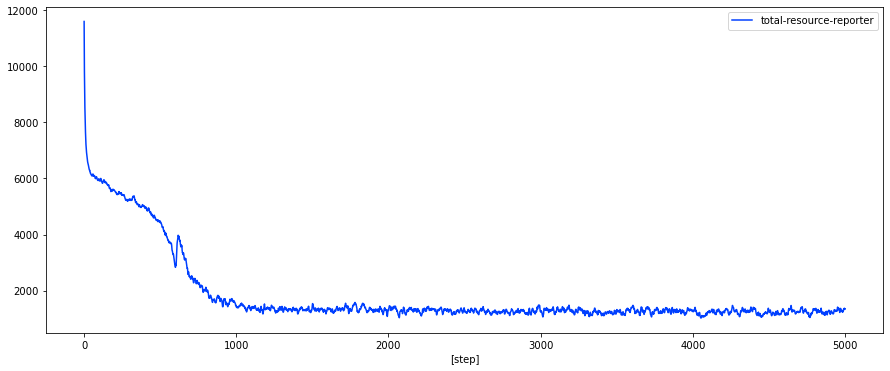

...Graph of total-patch-regrowth vs ticks


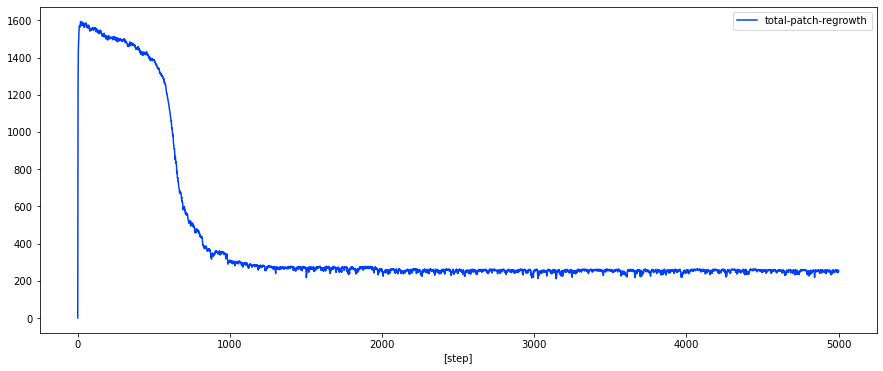

...Graph of total-turtle-resource-reporter vs ticks


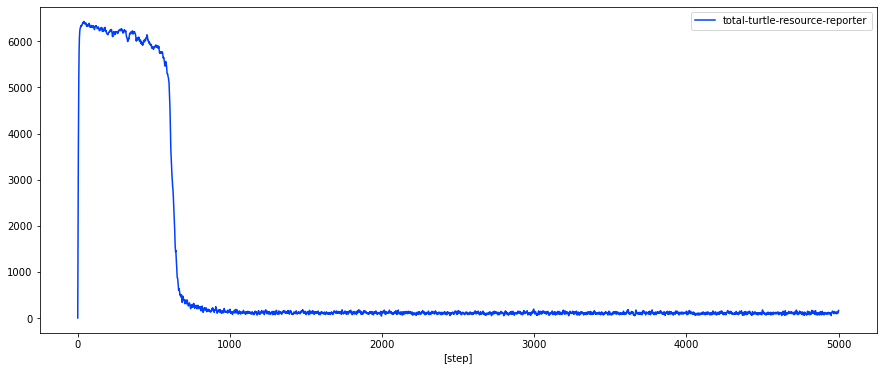

...Graph of total-quantity-harvested vs ticks


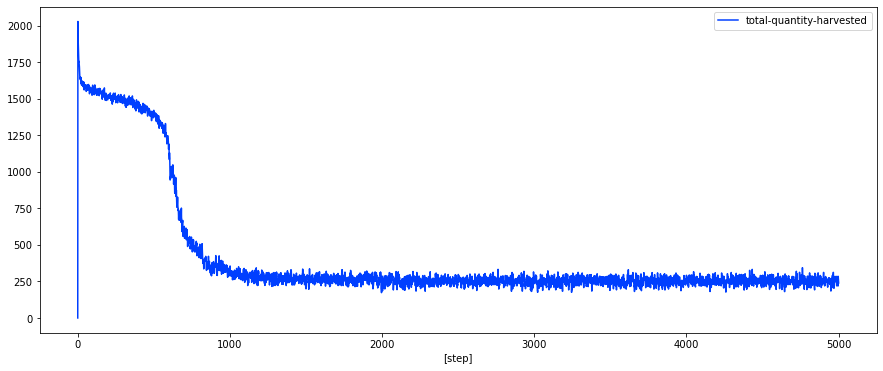

...Graph of number-of-hungry-turtles vs ticks


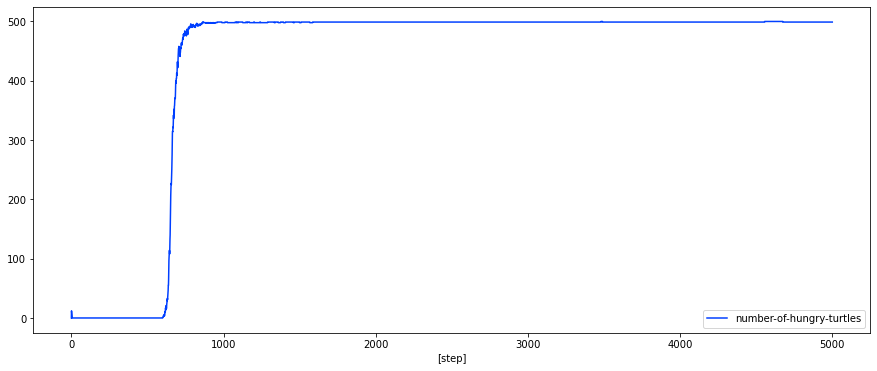

...Graph of total-wealth vs ticks


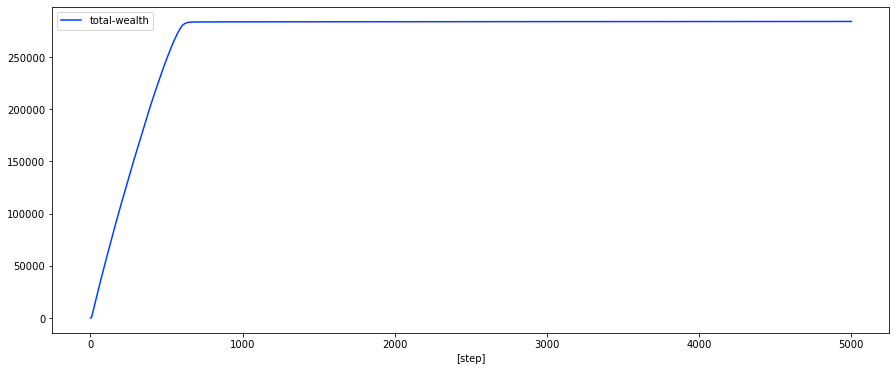

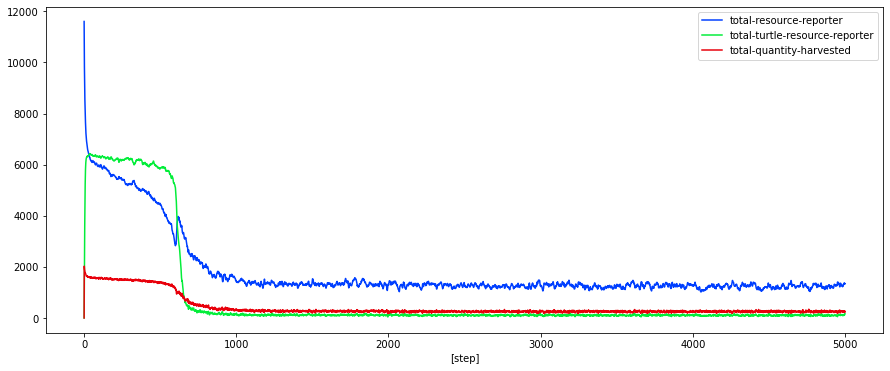

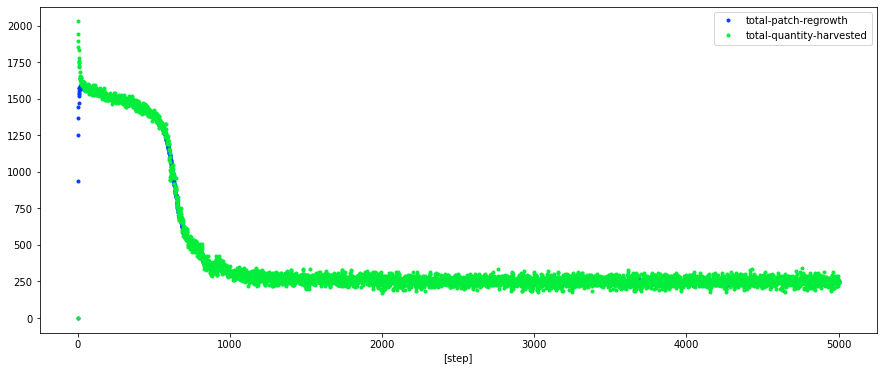

In [131]:
# Calling the function to generate all sort of plots based on the csv file read

process_netlogo_experiments_dataframe(df)